In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import RandomizedSearchCV, KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier,IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from xgboost import XGBClassifier
from sklearn.metrics import  confusion_matrix, classification_report, accuracy_score
import imblearn
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek
from collections import Counter

In [111]:
df = pd.read_csv('creditcard.csv')

In [112]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [113]:
col = df.columns.tolist()
print(col)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [114]:
df.isna().sum().sum()

0

In [115]:
df.shape

(284807, 31)

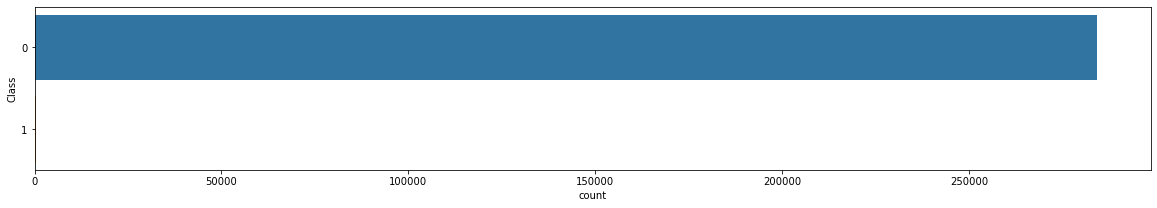

In [116]:
plt.figure(figsize=(20,3))
sns.countplot(data=df,y=df['Class'])
plt.show()

In [117]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [118]:
fraud = df[df['Class']==1]

In [119]:
n_outliers = len(fraud)
n_outliers

492

In [120]:
fair = df[df['Class']==0]
len(fair)

284315

In [121]:
outlier_factor = n_outliers/len(fair)
outlier_factor

0.0017304750013189597

In [122]:
y = df['Class'].copy()

In [123]:
del df['Class']   #I dont want memory loss

In [124]:
X = df.copy()

**scatter plot**

In [125]:
del df

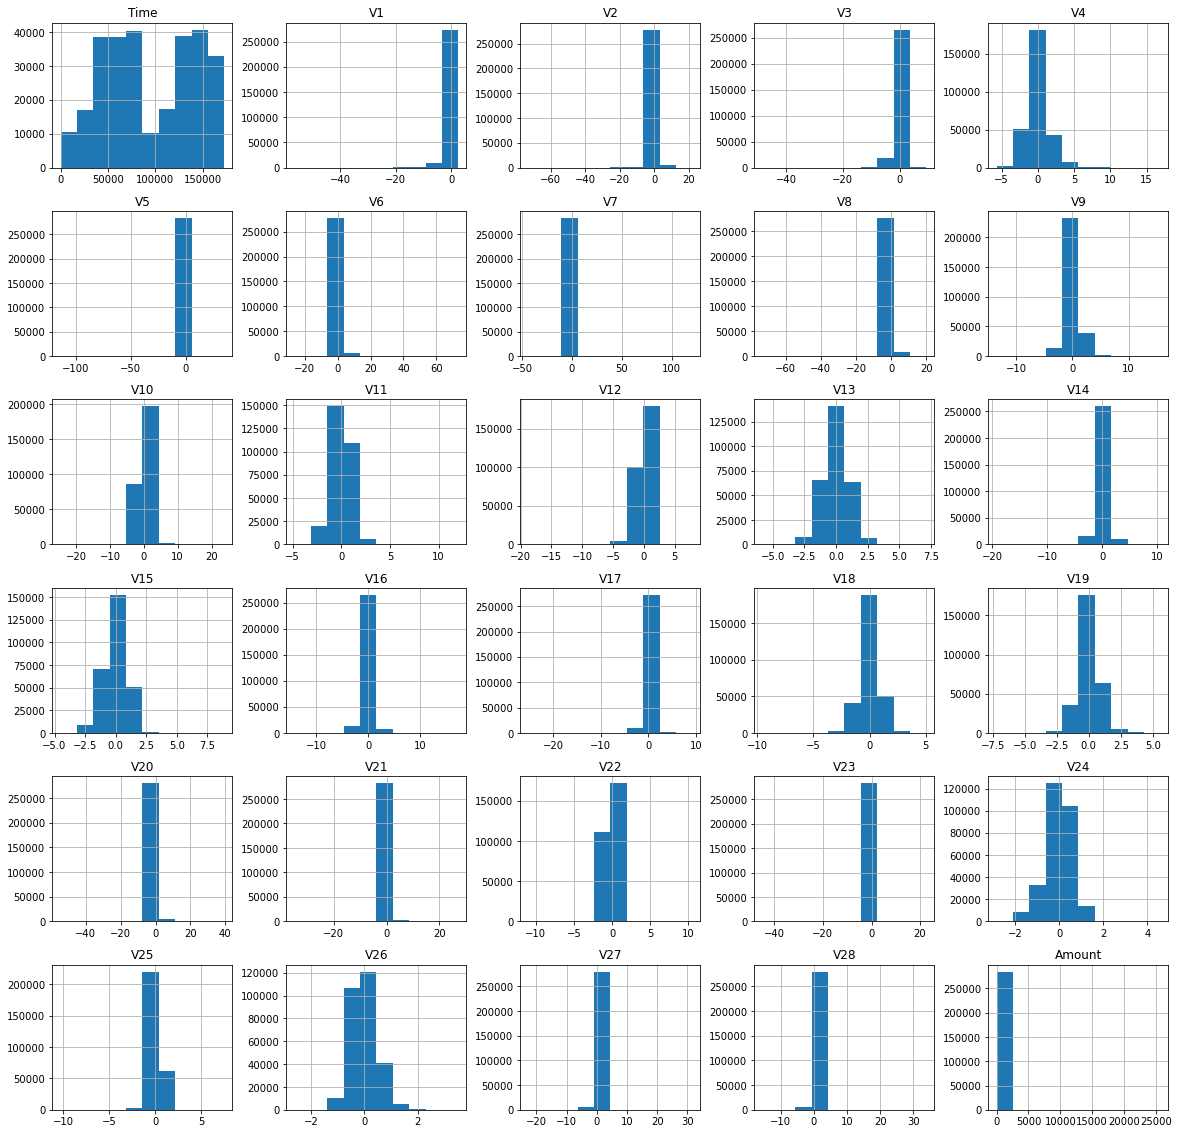

In [126]:
X.hist(figsize=(20,20))
plt.show()

In [35]:
X = np.array(X)
y = np.array(y)

In [36]:
X.shape,y.shape

((284807, 30), (284807,))

In [37]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

In [153]:
rfc = RandomForestClassifier()
grid = {'n_estimators':[100,200,300,500],'max_depth':[1,2,4],'max_leaf_nodes':[5,10,20,50],'random_state':[42]}
cv = KFold(n_splits=5,shuffle=False)

In [154]:
model = RandomizedSearchCV(rfc,grid,scoring='f1_macro',cv=cv,n_jobs=-1)

In [33]:
model.fit(xtrain,ytrain)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 4],
                                        'max_leaf_nodes': [5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300, 500],
                                        'random_state': [42]},
                   scoring='f1_macro')

In [34]:
model.best_params_

{'random_state': 42, 'n_estimators': 100, 'max_leaf_nodes': 10, 'max_depth': 2}

In [38]:
model = RandomForestClassifier(random_state = 42, n_estimators = 100, max_leaf_nodes = 10, max_depth = 2)

In [39]:
model.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=2, max_leaf_nodes=10, random_state=42)

In [40]:
ypred = model.predict(xtest)

In [41]:
conf = confusion_matrix(ytest,ypred)
acc = accuracy_score(ytest,ypred)
cl_report = classification_report(ytest,ypred)

In [42]:
print('Confusion Marix:-\n',conf)
print('-'*60)
print('Accuracy:',acc)
print('-'*60)
print('Classification Report:-\n',cl_report)

Confusion Marix:-
 [[71065    14]
 [   58    65]]
------------------------------------------------------------
Accuracy: 0.9989887924496503
------------------------------------------------------------
Classification Report:-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.82      0.53      0.64       123

    accuracy                           1.00     71202
   macro avg       0.91      0.76      0.82     71202
weighted avg       1.00      1.00      1.00     71202



In [43]:
xgb_model = XGBClassifier()

In [46]:
xgb_model.fit(xtrain,ytrain)

[00:49:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
y_pred = xgb_model.predict(xtest)

In [48]:
conf = confusion_matrix(ytest,y_pred)
acc = accuracy_score(ytest,y_pred)
cl_report = classification_report(ytest,y_pred)

In [49]:
print('Confusion Marix:-\n',conf)
print('-'*60)
print('Accuracy:',acc)
print('-'*60)
print('Classification Report:-\n',cl_report)

Confusion Marix:-
 [[71073     6]
 [   25    98]]
------------------------------------------------------------
Accuracy: 0.9995646189713772
------------------------------------------------------------
Classification Report:-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.94      0.80      0.86       123

    accuracy                           1.00     71202
   macro avg       0.97      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202



#### Now giving 100 times more Importance to fraud data sets

In [50]:
class_wt = dict({0:1,1:100})

In [51]:
xgb_model = XGBClassifier(class_weigt=class_wt)

In [52]:
xgb_model.fit(xtrain,ytrain)

[00:52:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { class_weigt } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:52:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', class_weigt={0: 1, 1: 100},
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [53]:
y_pred = xgb_model.predict(xtest)

In [54]:
conf = confusion_matrix(ytest,y_pred)
acc = accuracy_score(ytest,y_pred)
cl_report = classification_report(ytest,y_pred)

In [55]:
print('Confusion Marix:-\n',conf)
print('-'*60)
print('Accuracy:',acc)
print('-'*60)
print('Classification Report:-\n',cl_report)

Confusion Marix:-
 [[71073     6]
 [   25    98]]
------------------------------------------------------------
Accuracy: 0.9995646189713772
------------------------------------------------------------
Classification Report:-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.94      0.80      0.86       123

    accuracy                           1.00     71202
   macro avg       0.97      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202



* so, no increase of performance

### trying to use Over Sampling as Fraud datasets are very few

In [56]:
osample = RandomOverSampler(sampling_strategy=0.5) 

In [57]:
xtrain_os,ytrain_os = osample.fit_sample(xtrain,ytrain)

In [58]:
Counter(ytrain_os)

Counter({0: 213236, 1: 106618})

In [59]:
xgb_model = XGBClassifier()

In [60]:
xgb_model.fit(xtrain_os,ytrain_os)

[00:53:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
y_pred = xgb_model.predict(xtest)

In [62]:
xtest.shape

(71202, 30)

In [63]:
conf = confusion_matrix(ytest,y_pred)
acc = accuracy_score(ytest,y_pred)
cl_report = classification_report(ytest,y_pred)

In [64]:
print('Confusion Marix:-\n',conf)
print('-'*60)
print('Accuracy:',acc)
print('-'*60)
print('Classification Report:-\n',cl_report)

Confusion Marix:-
 [[71070     9]
 [   25    98]]
------------------------------------------------------------
Accuracy: 0.999522485323446
------------------------------------------------------------
Classification Report:-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.92      0.80      0.85       123

    accuracy                           1.00     71202
   macro avg       0.96      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202



* This is not also a good result so far

### SMOTETomek

In [65]:
smote = SMOTETomek() 
xtrain_st,ytrain_st = smote.fit_sample(xtrain,ytrain)
Counter(ytrain_st)

Counter({0: 212597, 1: 212597})

In [66]:
xgb_model = XGBClassifier()

In [67]:
xgb_model.fit(xtrain_st,ytrain_st)

[00:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
y_pred = xgb_model.predict(xtest)
conf = confusion_matrix(ytest,y_pred)
acc = accuracy_score(ytest,y_pred)
cl_report = classification_report(ytest,y_pred)

In [69]:
print('Confusion Marix:-\n',conf)
print('-'*60)
print('Accuracy:',acc)
print('-'*60)
print('Classification Report:-\n',cl_report)

Confusion Marix:-
 [[71055    24]
 [   18   105]]
------------------------------------------------------------
Accuracy: 0.9994101289289626
------------------------------------------------------------
Classification Report:-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.81      0.85      0.83       123

    accuracy                           1.00     71202
   macro avg       0.91      0.93      0.92     71202
weighted avg       1.00      1.00      1.00     71202



#### so, power of detecting the fraud is increased i,e TP value is increased

## Lets make model as  unsupervised learning with Isolation forest and local outlier factor

In [77]:
outlier_factor, n_outliers

(0.0017304750013189597, 492)

In [78]:
state = 42
model = {'Isolation Forest':IsolationForest(max_samples=len(X),contamination=outlier_factor,random_state=state),
        'Local Outlier Factor':LocalOutlierFactor(n_neighbors=20,contamination=outlier_factor)}

In [89]:
for i,(mod_name,mod) in enumerate(model.items()):
    if mod_name == 'Local Outlier Factor':
        y_preda = mod.fit_predict(X)
        pred_score = mod.negative_outlier_factor_
    else:
        mod.fit(X)
        pred_score = mod.decision_function(X)
        y_pred = mod.predict(X)

In [90]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
y_preda[y_preda == 1] = 0
y_preda[y_preda == -1] = 1

In [91]:
n_errors = (y_pred!= y).sum()
n_errors

679

In [92]:
n_errors_L = (y_preda!= y).sum()
n_errors_L

935

In [93]:
conf = confusion_matrix(y,y_pred)
acc = accuracy_score(y,y_pred)
cl_report = classification_report(y,y_pred)

In [94]:
print('Confusion Marix for Isolation Forest:-\n',conf)
print('-'*60)
print('Accuracy:',acc)
print('-'*60)
print('Classification Report:-\n',cl_report)

Confusion Marix for Isolation Forest:-
 [[283975    340]
 [   339    153]]
------------------------------------------------------------
Accuracy: 0.9976159293837581
------------------------------------------------------------
Classification Report:-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.31      0.31      0.31       492

    accuracy                           1.00    284807
   macro avg       0.65      0.65      0.65    284807
weighted avg       1.00      1.00      1.00    284807



In [95]:
conf = confusion_matrix(y,y_preda)
acc = accuracy_score(y,y_preda)
cl_report = classification_report(y,y_preda)

In [96]:
print('Confusion Marix for Local Outlier Factor:-\n',conf)
print('-'*60)
print('Accuracy:',acc)
print('-'*60)
print('Classification Report:-\n',cl_report)

Confusion Marix for Local Outlier Factor:-
 [[283847    468]
 [   467     25]]
------------------------------------------------------------
Accuracy: 0.9967170750718908
------------------------------------------------------------
Classification Report:-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.05      0.05       492

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807



### Now lets go for Neural network model

In [103]:
import keras
keras.__version__

'2.4.3'

In [123]:
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv1D, MaxPool1D
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam

In [109]:
xtrain_st.shape,ytrain_st.shape

((425248, 30), (425248,))

In [155]:
xtrain_st = np.array(xtrain_st).reshape(-1,30,1)
ytrain_st = np.array(ytrain_st)
xtest = np.array(xtest).reshape(-1,30,1)
ytest = np.array(ytest)

In [156]:
xtrain_st.shape,ytrain_st.shape

((425248, 30, 1), (425248,))

In [158]:
ytest.shape,xtest.shape

((71202,), (71202, 30, 1))

In [120]:
epochs =20
Model = Sequential()
Model.add(Conv1D(32,2,activation='relu',input_shape=xtrain_st[0].shape))
Model.add(BatchNormalization())
Model.add(Dropout(0.2))
Model.add(Conv1D(64,2,activation='relu'))
Model.add(BatchNormalization())
Model.add(Dropout(0.4))      
Model.add(Flatten())
Model.add(Dense(64,activation='relu'))
Model.add(Dropout(0.4))
Model.add(Dense(1,activation='sigmoid'))

In [121]:
Model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)             

In [124]:
Model.compile(optimizer=Adam(lr=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [125]:
hist = Model.fit(xtrain_st,ytrain_st,validation_split=0.3,epochs=epochs,verbose=1)

Epoch 1/20
9303/9303 [==============================] - 71s 8ms/step - loss: 0.0638 - accuracy: 0.9794 - val_loss: 0.0571 - val_accuracy: 0.9772
Epoch 2/20
9303/9303 [==============================] - 75s 8ms/step - loss: 0.0355 - accuracy: 0.9881 - val_loss: 0.0387 - val_accuracy: 0.9853
Epoch 3/20
9303/9303 [==============================] - 76s 8ms/step - loss: 0.0262 - accuracy: 0.9913 - val_loss: 0.0204 - val_accuracy: 0.9940
Epoch 4/20
9303/9303 [==============================] - 79s 8ms/step - loss: 0.0210 - accuracy: 0.9928 - val_loss: 0.0134 - val_accuracy: 0.9967
Epoch 5/20
9303/9303 [==============================] - 42s 5ms/step - loss: 0.0183 - accuracy: 0.9939 - val_loss: 0.0095 - val_accuracy: 0.9977
Epoch 6/20
9303/9303 [==============================] - 44s 5ms/step - loss: 0.0161 - accuracy: 0.9947 - val_loss: 0.0072 - val_accuracy: 0.9983
Epoch 7/20
9303/9303 [==============================] - 44s 5ms/step - loss: 0.0143 - accuracy: 0.9953 - val_loss: 0.0072 - val_ac

In [127]:
Model.evaluate(xtest)

2226/2226 [==============================] - 1s 663us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [134]:
loss = hist.history['loss']
v_loss = hist.history['val_loss']
acc = hist.history['accuracy']
v_acc = hist.history['val_accuracy']

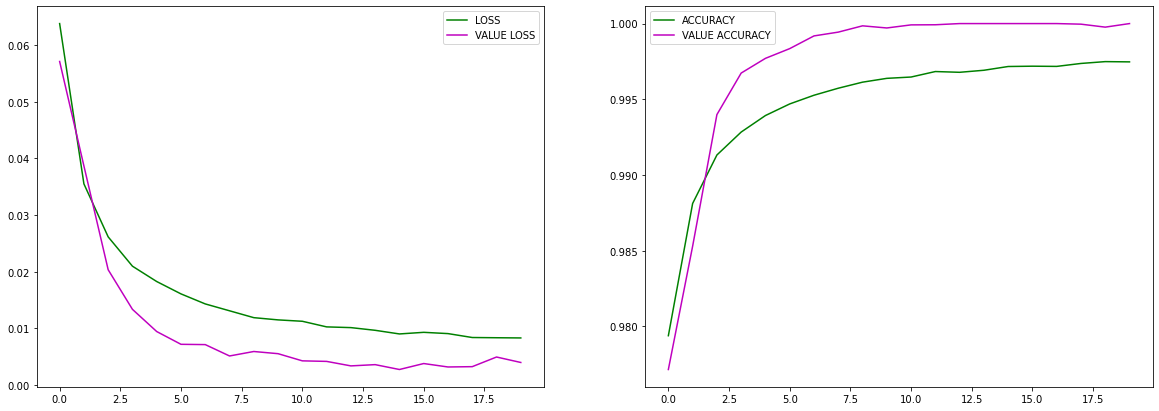

In [137]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,7))
ax1.plot(np.arange(epochs),loss,color='g',label='LOSS')
ax1.plot(np.arange(epochs),v_loss,color='m',label='VALUE LOSS')
ax2.plot(np.arange(epochs),acc,color='g',label='ACCURACY')
ax2.plot(np.arange(epochs),v_acc,color='m',label='VALUE ACCURACY')
ax1.legend()
ax2.legend()
plt.show()

In [160]:
y_pred = Model.predict(xtest)

In [166]:
y_pred = y_pred.round()

In [167]:
conf = confusion_matrix(ytest,y_pred)
acc = accuracy_score(ytest,y_pred)
cl_report = classification_report(ytest,y_pred)

In [168]:
print('Confusion Marix:-\n',conf)
print('-'*60)
print('Accuracy:',acc)
print('-'*60)
print('Classification Report:-\n',cl_report)

Confusion Marix:-
 [[70953   126]
 [   20   103]]
------------------------------------------------------------
Accuracy: 0.9979494958006797
------------------------------------------------------------
Classification Report:-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.45      0.84      0.59       123

    accuracy                           1.00     71202
   macro avg       0.72      0.92      0.79     71202
weighted avg       1.00      1.00      1.00     71202



### So, Xgboost Classifier model is best in this case... , lets save it

In [170]:
import pickle

In [171]:
with open('model.pickle', 'wb') as f:
    pickle.dump(xgb_model, f)

### Prediction from index 

In [97]:
df = pd.read_csv('creditcard.csv')

In [98]:
del df['Class']

In [106]:
def prediction(df=df,index=0):
    dic = {0:'Not Fraud',1:'Fraud'}
    data= np.array(df.iloc[index]).reshape(1,30)
    result = xgb_model.predict(data)[0]
    print(dic[result])

In [107]:
prediction(index=21000)

Not Fraud


In [108]:
prediction(index=2000)

Not Fraud


In [109]:
prediction(index=1100)

Not Fraud


In [110]:
prediction(index=210)

Not Fraud
